In [27]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.constants import R, k, h

In [28]:
class Pomiar:
    def __init__(self,T,t,A):
        self.T=T+273.15
        self.t=np.array(t)
        self.A=np.array(A)
        self.logA=np.log(self.A)
    def spraw(self):
        k=2.303*(self.logA[0]-self.logA[1:])/self.t[1:]
        m=np.mean(k)
        s=np.std(k)
        return m, s 
    def k(self,t=False):
        a=np.polyfit(self.t, self.logA,1)[0]
        b=np.polyfit(self.t, self.logA,1)[1]
        r=np.polyfit(self.t, self.logA,1,full=True)[1]
        R2=1 - r / sum((self.logA - self.logA.mean())**2) 
        k=-2.303*a
        if t==False:
            return k
        if t==True:
            return k, [a, b, R2]
def E_a(a, b):
    E_a=(R*np.log(a.k()/b.k()))/(1/b.T-1/a.T)
    return E_a
def StałaA(a, b, E):
    lnAa=np.log(a.k())+E/(R*a.T)
    lnAb=np.log(b.k())+E/(R*b.T)
    Aa=np.exp(lnAa)
    Ab=np.exp(lnAb)
    return np.mean([Aa, Ab])
def DeltaH(a, b):
    DeltaH=(R*np.log((a.k()*b.T)/(b.k()*a.T)))/(1/b.T-1/a.T)
    return DeltaH
def DeltaS(a, b, H):
    DSa=R*(np.log(a.k())-np.log(a.T*k/h))+H/a.T
    DSb=R*(np.log(b.k())-np.log(b.T*k/h))+H/b.T
    return np.mean([DSa, DSb])

In [29]:
t=[0,
0.25,
0.5,
0.75,
1,
1.25,
1.5,
1.75,
2,
2.25,
2.5,
2.75,
3,
3.25,
3.5,
3.75,
4,
4.25,
4.5,
4.75,
5,
5.25,
5.5,
5.75,
6,
6.25,
6.5,
6.75,
7,
7.25,
7.5,
7.75,
8,
8.25,
8.5,
8.75,
9,
9.25,
9.5,
9.75,
10,
10.25,
10.5,
10.75,
11,
11.25,
11.5,
11.75,
12]

In [30]:
P1=Pomiar(25,t,[1.41068,
1.3747,
1.34379,
1.3072,
1.27521,
1.24395,
1.21371,
1.18437,
1.15553,
1.12789,
1.10143,
1.07626,
1.05073,
1.02571,
1.00258,
0.98048,
0.95835,
0.93644,
0.91513,
0.89396,
0.87377,
0.85302,
0.83308,
0.81376,
0.795239,
0.77685,
0.75911,
0.74167,
0.72461,
0.70767,
0.69094,
0.67481,
0.65889,
0.64353,
0.62848,
0.61363,
0.59915,
0.584929,
0.571219,
0.55779,
0.5448,
0.53228,
0.51998,
0.50801,
0.49632,
0.48479,
0.47358,
0.46272,
0.45214])


In [31]:
P2=Pomiar(35,t,[1.808,
1.73773,
1.67086,
1.60547,
1.53983,
1.47522,
1.4124,
1.35363,
1.29329,
1.23831,
1.18362,
1.13161,
1.08056,
1.03112,
0.98378,
0.93803,
0.89401,
0.85388,
0.81121,
0.77207,
0.73349,
0.69852,
0.66382,
0.63027,
0.59859,
0.56781,
0.53869,
0.51088,
0.48464,
0.45957,
0.43605,
0.41338,
0.39222,
0.37197,
0.35263,
0.33436,
0.31755,
0.3012,
0.28585,
0.27137,
0.25766,
0.24491,
0.23285,
0.22156,
0.21096,
0.20106,
0.19148,
0.18266,
0.17439])

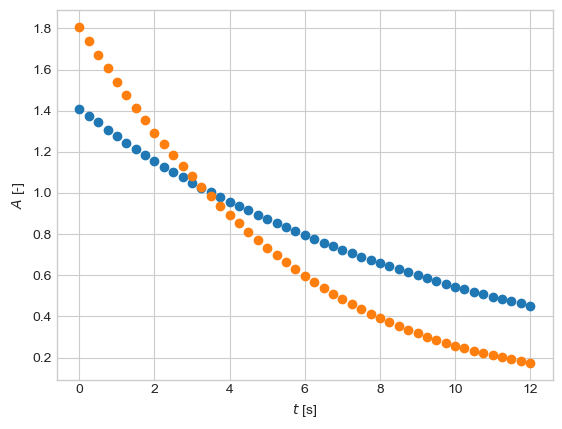

In [32]:
plt.scatter(P1.t,P1.A)
plt.scatter(P2.t,P2.A)
plt.xlabel('$t$ [s]')
plt.ylabel('$A$ [-]')
plt.style.use('seaborn-whitegrid')

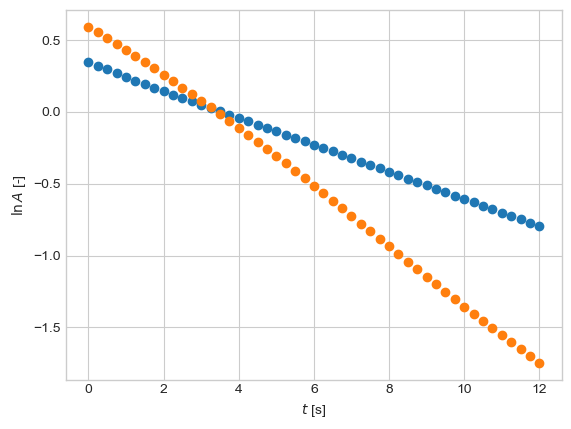

In [33]:
plt.scatter(P1.t,P1.logA)
plt.scatter(P2.t,P2.logA)
plt.xlabel('$t$ [s]')
plt.ylabel('$\ln A$ [-]')
plt.style.use('seaborn-whitegrid')

In [34]:
P1.k(),P2.k()

(0.2171199282995187, 0.4596345789315838)

In [35]:
P1.spraw(), P2.spraw()

((0.22251647451315829, 0.004941890488460962),
 (0.4190225241964552, 0.027791921225797475))

In [36]:
E_a=E_a(P1,P2)
E_a/1000

57.29041410017552

In [37]:
StałaA=StałaA(P1,P2,E_a)
StałaA

2363447691.6372414

In [38]:
DeltaH=DeltaH(P1,P2)
DeltaH/1000

54.77034189728559

In [39]:
DeltaS=DeltaS(P1,P2, DeltaH)
DeltaS

-73.92199912115657